## 1. Define the Problem

- Predict the logerror (different between Zillow predicted sales price and actual sales price)
for 6 specific transaction dates.
- Trying to find a pattern that is not already identified by the Zillow Prediction Algorithm

In [1]:
#import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR
import sklearn.preprocessing as preproc
import sklearn.model_selection as model_select
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
import time

__author__ = "Andy Gaworecki"
__email__ = "gaworecki5@gmail.com"

## 2. Discover
- load data
- clean data
- EDA
- establish baseline
- Hypothesize better solutions

In [2]:
# load the data
properties_2016 = pd.read_csv('properties_2016.csv')
properties_2017 = pd.read_csv('properties_2017.csv')
train_2016 = pd.read_csv('train_2016_v2.csv')
train_2017 = pd.read_csv('train_2017.csv')


/home/agaworecki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/agaworecki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Left join all the 2016 data together and the 2017 data together and the concat 
all the data into one train_df  

In [3]:
train_all = pd.merge(train_2016,properties_2016, on='parcelid',how='left')
train_all.transactiondate = pd.to_datetime(train_all.transactiondate)
train_all.set_index(['transactiondate','parcelid'],inplace=True)
train_all.head()

logerror  airconditioningtypeid  \
transactiondate parcelid                                    
2016-01-01      11016594    0.0276                    1.0   
                14366692   -0.1684                    NaN   
                12098116   -0.0040                    1.0   
2016-01-02      12643413    0.0218                    1.0   
                14432541   -0.0050                    NaN   

                          architecturalstyletypeid  basementsqft  bathroomcnt  \
transactiondate parcelid                                                        
2016-01-01      11016594                       NaN           NaN          2.0   
                14366692                       NaN           NaN          3.5   
                12098116                       NaN           NaN          3.0   
2016-01-02      12643413                       NaN           NaN          2.0   
                14432541                       NaN           NaN          2.5   

                          bedroomcnt  buildingclasstypeid  \
transactiondate parcelid                                    
2016-01-01      11016594         3.0                  NaN   
                14366692         4.0                  NaN   
                12098116         2.0                  NaN   
2016-01-02      12643413         2.0                  NaN   
                14432541         4.0                  NaN   

                          buildingqualitytypeid  calculatedbathnbr  \
transactiondate parcelid                                             
2016-01-01      11016594                    4.0                2.0   
                14366692                    NaN                3.5   
                12098116                    4.0                3.0   
2016-01-02      12643413                    4.0                2.0   
                14432541                    NaN                2.5   

                          decktypeid  ...  numberofstories  fireplaceflag  \
transactiondate parcelid              ...                                   
2016-01-01      11016594         NaN  ...              NaN            NaN   
                14366692         NaN  ...              NaN            NaN   
                12098116         NaN  ...              NaN            NaN   
2016-01-02      12643413         NaN  ...              NaN            NaN   
                14432541         NaN  ...              2.0            NaN   

                          structuretaxvaluedollarcnt  taxvaluedollarcnt  \
transactiondate parcelid                                                  
2016-01-01      11016594                    122754.0           360170.0   
                14366692                    346458.0           585529.0   
                12098116                     61994.0           119906.0   
2016-01-02      12643413                    171518.0           244880.0   
                14432541                    169574.0           434551.0   

                          assessmentyear  landtaxvaluedollarcnt  taxamount  \
transactiondate parcelid                                                     
2016-01-01      11016594          2015.0               237416.0    6735.88   
                14366692          2015.0               239071.0   10153.02   
                12098116          2015.0                57912.0   11484.48   
2016-01-02      12643413          2015.0                73362.0    3048.74   
                14432541          2015.0               264977.0    5488.96   

                          taxdelinquencyflag  taxdelinquencyyear  \
transactiondate parcelid                                           
2016-01-01      11016594                 NaN                 NaN   
                14366692                 NaN                 NaN   
                12098116                 NaN                 NaN   
2016-01-02      12643413                 NaN                 NaN   
                14432541                 NaN                 NaN   

                     

In [4]:
train_all_2017 = pd.merge(train_2017,properties_2017, on='parcelid',how='left')
train_all_2017.transactiondate = pd.to_datetime(train_all_2017.transactiondate)
train_all_2017.set_index(['transactiondate','parcelid'],inplace=True)
train_all_2017.head()

logerror  airconditioningtypeid  \
transactiondate parcelid                                    
2017-01-01      14297519  0.025595                    NaN   
                17052889  0.055619                    NaN   
                14186244  0.005383                    NaN   
                12177905 -0.103410                    NaN   
                10887214  0.006940                    1.0   

                          architecturalstyletypeid  basementsqft  bathroomcnt  \
transactiondate parcelid                                                        
2017-01-01      14297519                       NaN           NaN          3.5   
                17052889                       NaN           NaN          1.0   
                14186244                       NaN           NaN          2.0   
                12177905                       NaN           NaN          3.0   
                10887214                       NaN           NaN          3.0   

                          bedroomcnt  buildingclasstypeid  \
transactiondate parcelid                                    
2017-01-01      14297519         4.0                  NaN   
                17052889         2.0                  NaN   
                14186244         3.0                  NaN   
                12177905         4.0                  NaN   
                10887214         3.0                  NaN   

                          buildingqualitytypeid  calculatedbathnbr  \
transactiondate parcelid                                             
2017-01-01      14297519                    NaN                3.5   
                17052889                    NaN                1.0   
                14186244                    NaN                2.0   
                12177905                    8.0                3.0   
                10887214                    8.0                3.0   

                          decktypeid  ...  numberofstories  fireplaceflag  \
transactiondate parcelid              ...                                   
2017-01-01      14297519         NaN  ...              NaN            NaN   
                17052889         NaN  ...              1.0            NaN   
                14186244         NaN  ...              1.0            NaN   
                12177905         NaN  ...              NaN            NaN   
                10887214         NaN  ...              NaN            NaN   

                          structuretaxvaluedollarcnt  taxvaluedollarcnt  \
transactiondate parcelid                                                  
2017-01-01      14297519                    485713.0          1023282.0   
                17052889                     88000.0           464000.0   
                14186244                     85289.0           564778.0   
                12177905                    108918.0           145143.0   
                10887214                     73681.0           119407.0   

                          assessmentyear  landtaxvaluedollarcnt  taxamount  \
transactiondate parcelid                                                     
2017-01-01      14297519          2016.0               537569.0   11013.72   
                17052889          2016.0               376000.0    5672.48   
                14186244          2016.0               479489.0    6488.30   
                12177905          2016.0                36225.0    1777.51   
                10887214          2016.0                45726.0    1533.89   

                          taxdelinquencyflag  taxdelinquencyyear  \
transactiondate parcelid                                           
2017-01-01      14297519                 NaN                 NaN   
                17052889                 NaN                 NaN   
                14186244                 NaN                 NaN   
                12177905                 NaN                 NaN   
                10887214                 NaN                 NaN   

                     

In [5]:
train_df = pd.concat([train_all,train_all_2017])

Clean Data
There are many NaNs that we will need to deal with

In [14]:
#check the number of categories and 
for col in train_df.columns:
    print('{} - categories: {} \t nulls: {} '.
          format(col, train_df[col].value_counts().count(),train_df[col].isnull().mean()))

logerror - categories: 78958 	 nulls: 0.0 
airconditioningtypeid - categories: 6 	 nulls: 0.6796197464976651 
architecturalstyletypeid - categories: 6 	 nulls: 0.9972124273325074 
basementsqft - categories: 78 	 nulls: 0.9994460592776137 
bathroomcnt - categories: 25 	 nulls: 0.0002025159630229677 
bedroomcnt - categories: 17 	 nulls: 0.0002025159630229677 
buildingclasstypeid - categories: 2 	 nulls: 0.9998153530925379 
buildingqualitytypeid - categories: 12 	 nulls: 0.36163990279233776 
calculatedbathnbr - categories: 24 	 nulls: 0.010912036595825788 
decktypeid - categories: 2 	 nulls: 0.0 
finishedfloor1squarefeet - categories: 2274 	 nulls: 0.92320475555132 
calculatedfinishedsquarefeet - categories: 5825 	 nulls: 0.00533689126084056 
finishedsquarefeet12 - categories: 5729 	 nulls: 0.049848708662918136 
finishedsquarefeet13 - categories: 17 	 nulls: 0.9995532736109788 
finishedsquarefeet15 - categories: 2619 	 nulls: 0.9607416849328123 
finishedsquarefeet50 - categories: 2301 	 n

In [9]:
#make all columns with only one category into binary
for col in train_df.columns:
    if train_df[col].value_counts().count() == 1:
        train_df[col].loc[train_df[col].isnull()] = 0

In [24]:
train_df[train_df.roomcnt.isnull() & 

logerror                        34
airconditioningtypeid            0
architecturalstyletypeid         0
basementsqft                     0
bathroomcnt                      0
bedroomcnt                       0
buildingclasstypeid              0
buildingqualitytypeid            0
calculatedbathnbr                0
decktypeid                      34
finishedfloor1squarefeet         0
calculatedfinishedsquarefeet     0
finishedsquarefeet12             0
finishedsquarefeet13             0
finishedsquarefeet15             0
finishedsquarefeet50             0
finishedsquarefeet6              0
fips                             0
fireplacecnt                     0
fullbathcnt                      0
garagecarcnt                     0
garagetotalsqft                  0
hashottuborspa                  34
heatingorsystemtypeid            0
latitude                         0
longitude                        0
lotsizesquarefeet                0
poolcnt                         34
poolsizesum         

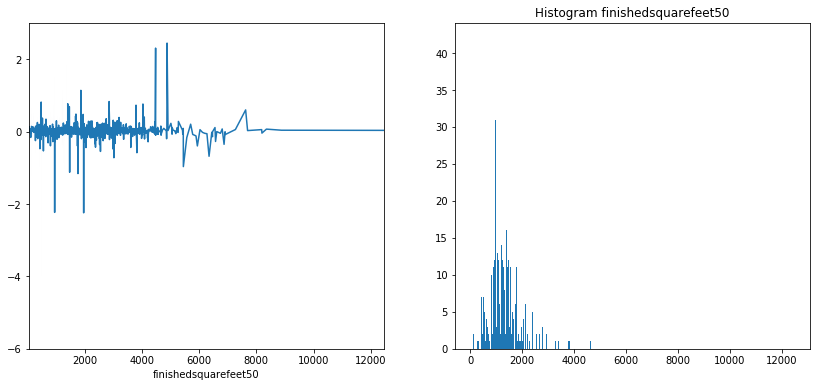

In [170]:
def plot_features(df, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].value_counts().count() < 20:
        sns.boxplot(x = col, y = 'logerror', data=df)
        plt.title('Boxplot' + str(col))
    else:
        #plot the mean logerror for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['logerror'].mean()
        std = df.groupby(col)['logerror'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)        
    #plot histogram of feature
    plt.subplot(1, 2, 2)    
    min = df[col].min()
    max = df[col].max()
    bins = np.arange(min, max)
    plt.hist(df[col], bins=bins, alpha=1)
    plt.title('Histogram '+ str(col))
    plt.show()

plot_features(train_df, 'finishedsquarefeet50')



ValueError: negative dimensions are not allowed

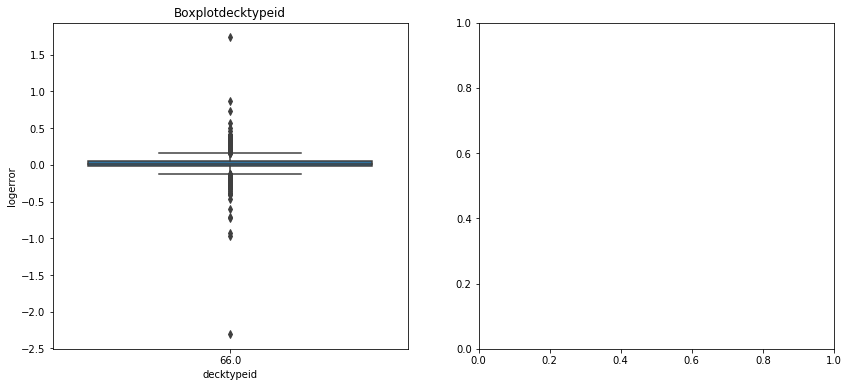

In [172]:
plot_features(train_df,'decktypeid')
# train_df.storytypeid.value_counts().count()
# # if len(train_df['storytypeid'].value_counts()) < 20:
# #     sns.boxplot(x = 'storytypeid', y = 'logerror', data=train_df)

# min = train_df[col].min()
# max = train_df[col].max()
# bins = np.arange(min, max, (max-min)/100)
# plt.hist(train_df[col], bins=bins, alpha=1)

In [140]:
train_df.groupby('poolcnt').roomcnt.mean()

poolcnt
1.0    1.663742
Name: roomcnt, dtype: float64

In [12]:
properties_2017.airconditioningtypeid.value_counts().sort_values(ascending=False)

1.0     744291
13.0     58487
5.0       8795
9.0       1905
11.0      1818
12.0        59
3.0          7
Name: airconditioningtypeid, dtype: int64

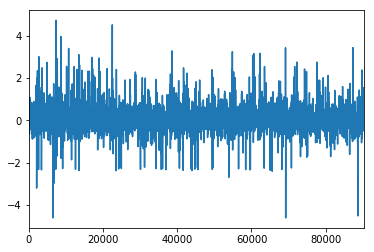

In [29]:
train_2016.logerror.plot()

In [49]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub